**4 sensors and 4 E value prediction!**

In this lab, we will work on something that we have did in Homework 18 with 4 sensors and 4 E values in a 1D bar. We will try to implement  Deep Neural Network to predict proper E1, E2, E3, and E4 values. Hope you are excited about this as well!

YOU GET TO DEFINE YOUR OWN MODEL FROM SCRATCH! The input and output layer has been setup for you, plug in the hidden layer code using Lab 4 as reference and build your model.
Further try tweaking the different parameters to improve your model to get the lowest mae (loss) and mse (metric) as possible.

The problem we are working with is a 4 sensor 1D bar problem.

We will train our model using the displacement *u* values to try to predict the corresponding *E* values. We will dive deeper into how the data looks like and how we feed it into the model.

**Problem Statement**

Use Deep Neural Network to tackle the following problem.

Let us consider that we discretize the domain of the following bar by using 10 elements for all of the above
cases. We also consider to use not only the nodes between the both ends but also those at the both
ends. That is, for 10 elements, we will use 11 node points. This discretization will lead to 11-by-11
K (stiffness) matrix and 11-by-1 F (force) vector before we tailor them. You have already done this in MATLAB in homework 18.

For computations, use the following values: L = 10 m, P0 = 100 N/m, E = 10^9 N/m2, A = 0.01 m2, and f = 1000 N.

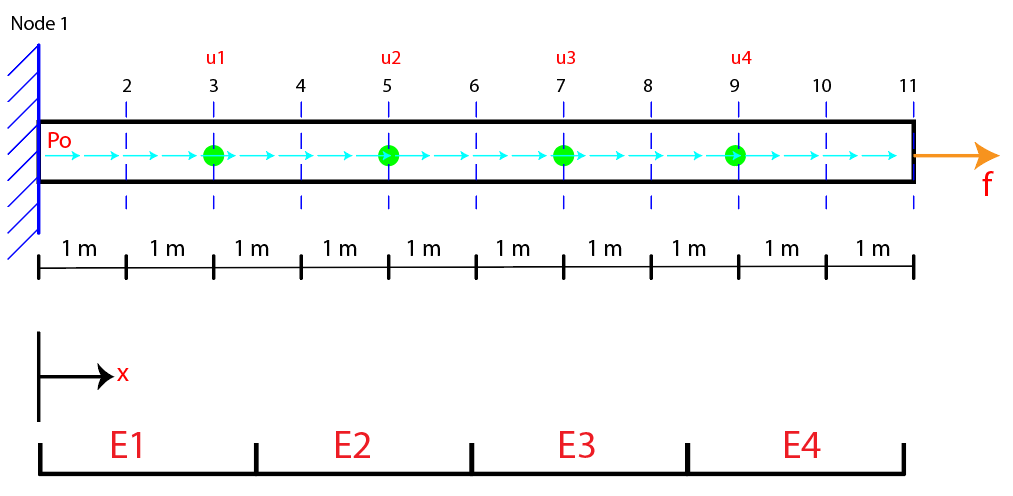

##Import Libraries and Dataset

In [ ]:
import pandas as pd #Used to read data from excel files
import numpy as np #Used for numerical computations

#Training and test dataset links

traindataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%205:%201D%204Sensor%20Dataset/trainingData.xlsx?raw=true'
testdataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%205:%201D%204Sensor%20Dataset/testData.xlsx?raw=true'

#Read values from the excel file in those links, convert them to...
#numpy arrays and store them in train_data and test_data variable

train_data = np.array(pd.read_excel(traindataLink))
test_data = np.array(pd.read_excel(testdataLink))

Let's see how the data looks like.



In [ ]:
print(train_data.shape)
print(test_data.shape)

This shows that the training data has 14999 training examples and the test dataset has 2999 values.

The data in excel file looks like this.
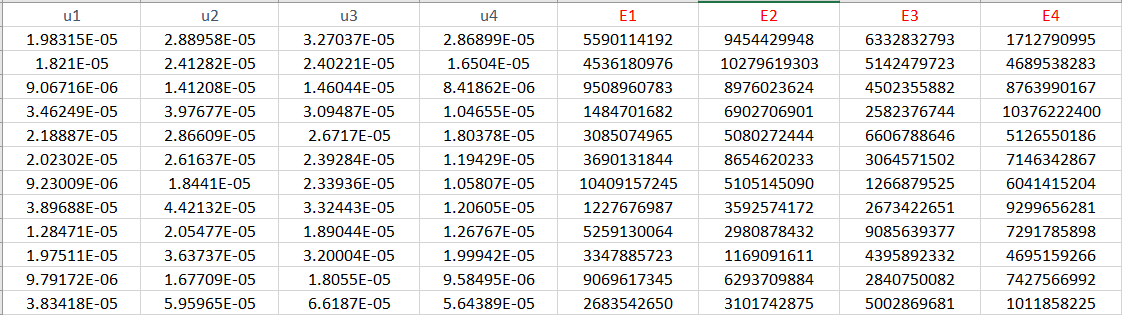

We can clearly see that the first example has 8 categories of data in a single training example. The above image only shows the first 11 examples of the 14999 training datasets present in the excel file. The first column contains u1 values, second u2 values, third contains u3 values, fourth column contains u4 values, fifth column consists of E1, sixth column consists of E2 values, seventh column consists of E3, and the eighth column consists of E4 values.

Here u1, u2, u3, and u4 are **input** values that we will feed into the model. E1, E2, E3, and E2 values are out so-called **targets**. Basically, we will try to predict E1, E2, E3, and E4 values using u1, u2, u3, and u4 values.

In the next cell, we will assign the column values to specific variable names.

Sidenote: Remember that indexing in Python starts from 0 and not 1 like MATLAB. So, to access the 1st column you would need to access the 0th column.

In [ ]:
#Assign all training examples and first column values to u1_train variable
u1_train = train_data[:, 0]

#Assign all training examples and second column values to u2_train variable
u2_train = train_data[:, 1]

#Assign all training examples and third column values to u3_train variable
u3_train = train_data[:, 2]

#Assign all training examples and fourth column values to u4_train variable
u4_train = train_data[:, 3]


#Assign all training examples and fifth column values to E1_train variable
E1_train = train_data[:, 4]

#Assign all training examples and sixth column values to E2_train variable
E2_train = train_data[:, 5]

#Assign all training examples and seventh column values to E3_train variable
E3_train = train_data[:, 6]

#Assign all training examples and eigth column values to E4_train variable
E4_train = train_data[:, 7]

Do the same with test dataset as well. Assign them to u1_test, u2_test,... and likewise.

In [ ]:
u1_test = test_data[:, 0]
u2_test = test_data[:, 1]
u3_test = test_data[:, 2]
u4_test = test_data[:, 3]

E1_test = test_data[:, 4]
E2_test = test_data[:, 5]
E3_test = test_data[:, 6]
E4_test = test_data[:, 7]

##Data-preprocessing

We will have to normalize this dataset as well. Referring to Lab 4 on how we normalized our dataset, we will use the same z-score normalizing method

u1 = (u1 - mean of u1) / (highest u1 value - lowest u1 value)

u2 = (u2 - mean of u2) / (highest u2 value - lowest u2 value)

u3 = (u3 - mean of u3) / (highest u3 value - lowest u3 value)

u4 = (u4 - mean of u4) / (highest u4 value - lowest u4 value)

Similarly, we will normalize E1 and E2 using the same concept so that our range of **input** data and the **targets** are almost between 0-1 so that the model converges better and faster with better results.

Let's see the range of values that our u1, u2, u3, and u4 and E1, E2, E3, and E4 values we initially had.


In [ ]:
print("u1 values range from %f to %f" %(np.min(u1_train), np.max(u1_train)))
print("u2 values range from %f to %f" %(np.min(u2_train), np.max(u2_train)))
print("u3 values range from %f to %f" %(np.min(u3_train), np.max(u3_train)))
print("u4 values range from %f to %f" %(np.min(u4_train), np.max(u4_train)))

print("")

print("E1 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E1_train)/1e9, np.max(E1_train)/1e9))
print("E2 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E2_train)/1e9, np.max(E2_train)/1e9))
print("E3 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E3_train)/1e9, np.max(E3_train)/1e9))
print("E4 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E4_train)/1e9, np.max(E4_train)/1e9))

Like we saw in Lab 4, E values have huge range differences.

Let's normalize the u and E values to bring them closer to something that is between 0 and 1.

Since we will be repeating the normalizing functionality to multiple variables, it makes sense to define a function in Python. We will learn about defining one later but try to understand how we calculate the mean and range values using numpy to normalize the dataset. 

In [ ]:
#We define global variables to make it possible for us to use it anywhere in our Colab file
global u1_train_mean, u2_train_mean, u3_train_mean, u4_train_mean, E1_train_mean, E2_train_mean, E3_train_mean, E4_train_mean
global u1_train_range, u2_train_range, u3_train_range, u4_train_range, E1_train_range, E2_train_range, E3_train_range, E4_train_range

#Using numpy to calculate mean
u1_train_mean = np.mean(u1_train)
#Using numpy to calculate range
u1_train_range = np.max(u1_train)-np.min(u1_train)

#Similar with rest
u2_train_mean = np.mean(u2_train)
u2_train_range = np.max(u2_train)-np.min(u2_train)

u3_train_mean = np.mean(u3_train)
u3_train_range = np.max(u3_train)-np.min(u3_train)

u4_train_mean = np.mean(u4_train)
u4_train_range = np.max(u4_train)-np.min(u4_train)

E1_train_mean = np.mean(E1_train)
E1_train_range = np.max(E1_train)-np.min(E1_train)

E2_train_mean = np.mean(E2_train)
E2_train_range = np.max(E2_train)-np.min(E2_train)

E3_train_mean = np.mean(E3_train)
E3_train_range = np.max(E3_train)-np.min(E3_train)

E4_train_mean = np.mean(E4_train)
E4_train_range = np.max(E4_train)-np.min(E4_train)

In [ ]:
def normalize(u1, u2, u3, u4, E1, E2, E3, E4):
  u1 = (u1 - u1_train_mean)/u1_train_range
  u2 = (u2 - u2_train_mean)/u2_train_range
  u3 = (u3 - u3_train_mean)/u3_train_range
  u4 = (u4 - u4_train_mean)/u4_train_range

  E1 = (E1 - E1_train_mean)/E1_train_range
  E2 = (E2 - E2_train_mean)/E2_train_range
  E3 = (E3 - E3_train_mean)/E3_train_range
  E4 = (E4 - E4_train_mean)/E4_train_range

  return u1, u2, u3, u4, E1, E2, E3, E4

Use the defined function to normalize.

In [ ]:
#Normalizes the variables u1_train, u2_train, u3_train, E1_train, and E2_train
u1_train, u2_train, u3_train, u4_train, E1_train, E2_train, E3_train, E4_train = \
  normalize(u1_train, u2_train, u3_train, u4_train, E1_train, E2_train, E3_train, E4_train)

#'\' Signifies a line break, similar to ... in MATLAB

#Normalizes the test set as well
u1_test, u2_test, u3_test, u4_test, E1_test, E2_test, E3_test, E4_test = \
  normalize(u1_test, u2_test, u3_test, u4_test, E1_test, E2_test, E3_test, E4_test)

Now, let's see the range of values of u and E. Notice how the u and E values are almost similar range!

In [ ]:
print("u1 values range from %f to %f" %(np.min(u1_train), np.max(u1_train)))
print("u2 values range from %f to %f" %(np.min(u2_train), np.max(u2_train)))
print("u3 values range from %f to %f" %(np.min(u3_train), np.max(u3_train)))
print("u4 values range from %f to %f" %(np.min(u4_train), np.max(u4_train)))

print("")

print("E1 values range from %0.5f to %0.5f" %(np.min(E1_train), np.max(E1_train)))
print("E2 values range from %0.5f to %0.5f" %(np.min(E2_train), np.max(E2_train)))
print("E3 values range from %0.5f to %0.5f" %(np.min(E3_train), np.max(E3_train)))
print("E4 values range from %0.5f to %0.5f" %(np.min(E4_train), np.max(E4_train)))

Like I said in the last lab, we are done with the hard part. Let's arrange the different variables such that we can actually feed it into the model. We will stack the u1, u2, u3, and u4 values column wise such that they align something like.

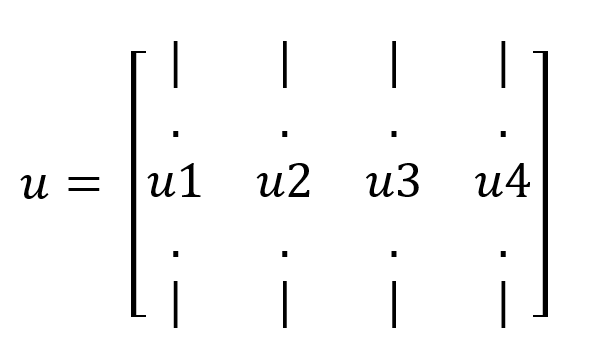

Similarly, we will also stack the E1, E2, E3, and E4 values column wise to appear something like.
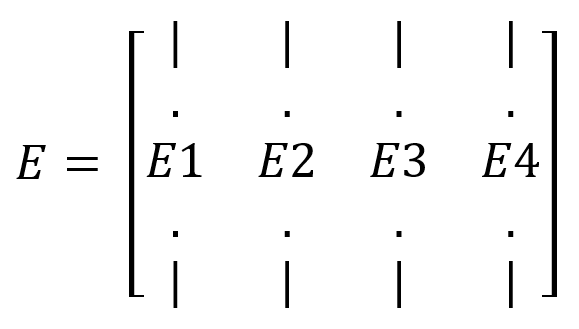

In [ ]:
u_train = np.dstack((u1_train, u2_train, u3_train, u4_train)).squeeze()
u_test = np.dstack((u1_test, u2_test, u3_test, u4_test)).squeeze()

E_train = np.dstack((E1_train, E2_train, E3_train, E4_train)).squeeze()
E_test = np.dstack((E1_test, E2_test, E3_test, E4_test)).squeeze()

So, after after doing this, how does our input and target array shape up. Let's observe that.

In [ ]:
print('Before stacking the u values, the shapes were:')
print('Shape of u1', np.shape(u1_train))
print('Shape of u2', np.shape(u2_train))
print('Shape of u3', np.shape(u3_train))
print('Shape of u4', np.shape(u4_train))

print("")
print('After stacking the u values, the shape of the u-input variable is:')
print('Shape of u', np.shape(u_train))

If you try to implement the similar with E1 and E2 then you will get the final shape of E stacked variable as (15999, 2).

Let's start with some Machine Learning!

**TASK**

Build your own ML regression model. Use Lab 4 as an example and try out different things from scratch and see what different combinations can produce the lowest accuracy. Do your best!

Useful Links:

[Activation Functions](https://keras.io/api/layers/activations/)

[Optimizers](https://keras.io/api/optimizers/)

In [ ]:
from keras import models, layers


#Like always, import a sequential model
model = models.Sequential()


#First input layer
model.add(layers.InputLayer((u_train.shape[1])))

###START YOUR CODE HERE####
#Hidden Layers



#Output Layer
#Pay special attention to this layer or the model won't work
#HINT: We need to predict E1, E2, E3, and E4



###END YOUR CODE HERE####

print("Test:")
model.evaluate(u_test, E_test)
model.summary()

**QUESTION:**

Please write a concise report on how you built your Machine Learning model. Talk about the number of layers, the number of nodes in each layer, the activation functions, the optimizers, and the epoch and batch sizes.

Let's see it in action where the values actually makes more sense. We calculate the percent difference of the actual value and the value we are predicting using the model.

In [ ]:
testdataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%205:%201D%204Sensor%20Dataset/testData.xlsx?raw=true'

test_data = np.array(pd.read_excel(testdataLink))

In [ ]:
test_num = 2598
u1_test = test_data[test_num, 0]
u2_test = test_data[test_num, 1]
u3_test = test_data[test_num, 2]
u4_test = test_data[test_num, 3]

E1_test = test_data[test_num, 4]
E2_test = test_data[test_num, 5]
E3_test = test_data[test_num, 6]
E4_test = test_data[test_num, 7]

In [ ]:
u1_test, u2_test, u3_test, u4_test, E1_test, E2_test, E3_test, E4_test = \
  normalize(u1_test, u2_test, u3_test, u4_test, E1_test, E2_test, E3_test, E4_test)

u_test = np.dstack((u1_test, u2_test, u3_test, u4_test)).squeeze()

In [ ]:
u_test = u_test.reshape((1, 4))

E_pred = model.predict(u_test)

In [ ]:
E1_pred = E_pred[0, 0]
E2_pred = E_pred[0, 1]
E3_pred = E_pred[0, 2]
E4_pred = E_pred[0, 3]

In [ ]:
E1_pred = E1_pred * E1_train_range + E1_train_mean
E2_pred = E2_pred * E2_train_range + E2_train_mean
E3_pred = E3_pred * E3_train_range + E3_train_mean
E4_pred = E4_pred * E4_train_range + E4_train_mean

In [ ]:
print("E1 prediction: %f N/m2\nE2 prediction: %f N/m2\nE3 prediction: %f N/m2\nE4 prediction: %f N/m2" %(E1_pred, E2_pred, E3_pred, E4_pred))

In [ ]:
E1_test = E1_test * E1_train_range + E1_train_mean
E2_test = E2_test * E2_train_range + E2_train_mean
E3_test = E3_test * E3_train_range + E3_train_mean
E4_test = E4_test * E4_train_range + E4_train_mean

print("Actual E1 value: %f N/m2\nActual E2 value: %f N/m2\nActual E3 value: %f N/m2\nActual E4 value: %f N/m2" %(E1_test, E2_test, E3_test, E4_test))

In [ ]:
errorE1 = abs((E1_pred - E1_test)/E1_test*100)
errorE2 = abs((E2_pred - E2_test)/E2_test*100)
errorE3 = abs((E3_pred - E3_test)/E3_test*100)
errorE4 = abs((E4_pred - E4_test)/E4_test*100)

print("Error in prediction of E1: %0.2f percent" %errorE1)
print("Error in prediction of E2: %0.2f percent" %errorE2)
print("Error in prediction of E3: %0.2f percent" %errorE3)
print("Error in prediction of E4: %0.2f percent" %errorE4)

**QUESTION**

What percent differences did you observe in this particular training example you took to test your model's working?

YOUR ANSWER: